# Import packages

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create dataframes

### Import complete data set for Class A, Ship 1, MRGs

Create function to import file to dataframe and convert datetime to datetime format

In [2]:
def readFileConvertdt(filename):
    df = pd.read_csv(filename)
    df['DateTime'] = pd.to_datetime(df.DateTime)
    return(df)

In [3]:
filename = 'data/classA_ship1_allMRG.csv'
A1_MRG_all = readFileConvertdt(filename)

In [156]:
A1_MRG_all.shape

(294926, 38)

In [158]:
A1_MRG_all.dtypes

DateTime              datetime64[ns]
TURBINE INLET TEMP           float64
TURB OVER TEMP               float64
TURN GR ENGAGED              float64
TURN GR DISENGD              float64
THRUST BRG TEMP              float64
SUMP TEMP                    float64
SHAFT RPM                    float64
MOST RMT BRG PRES            float64
LO HEADER TEMP               float64
LO HEADER PRES               float64
BRG #9 TEMP                  float64
BRG #8 TEMP                  float64
BRG #7 TEMP                  float64
BRG #6 TEMP                  float64
BRG #5 TEMP                  float64
BRG #4 TEMP                  float64
BRG #3 TEMP                  float64
BRG #26 TEMP                 float64
BRG #25 TEMP                 float64
BRG #24 TEMP                 float64
BRG #23 TEMP                 float64
BRG #22 TEMP                 float64
BRG #21 TEMP                 float64
BRG #20 TEMP                 float64
BRG #2 TEMP                  float64
BRG #19 TEMP                 float64
B

### Create separate dataframe for each system

In [9]:
def splitDF(df, indicatorName = 'indicator'):
    # Create list of unique indicators
    uniqueInds = df[indicatorName].unique()
    
    # Create empty set for storing split dfs
    dfs = {}
    # For each unique indicator, create a separate df and add to dfs set
    for i, ind in enumerate(uniqueInds):
        dfs[i] = df[df[indicatorName]==ind].drop[indicatorName].copy()
        
    return(dfs.values())

In [10]:
A1_MRG_1,A1_MRG_2 = splitDF(A1_MRG_all)

In [12]:
print('A1_MRG_1: ',A1_MRG_1.shape)
print('A1_MRG_2: ',A1_MRG_2.shape)

A1_MRG_1:  (148004, 38)
A1_MRG_2:  (146922, 38)


In [13]:
def TSrepeat(df):
    # Find IDs of all data reset locations (find indices of values occuring at minimum)
    chg_indices = np.asarray(df.loc[df['DateTime'] == np.min(df['DateTime'])].index.tolist())
    # Get rid of first minimum (index 0)
    chg_indices = chg_indices[1:]

    # Create sets of indices for each run
    start=0
    chg_indices_set=[]
    for i, ci in enumerate(chg_indices):
        stop = ci
        chg_indices_set.append((start,stop))
        start = stop
    # add index set for final run
    chg_indices_set.append((start,df.shape[0]))
#     print(chg_indices_set)
    # Check if each run 
    for i in range(len(chg_indices_set)-1):
        start0,stop0 = chg_indices_set[i]
        runlength = stop0-start0
        start1 = stop0
        stop1 = runlength+start1
        allMatch = df.iloc[start0:stop0].drop('indicator',axis=1).reset_index(drop=True).equals(df.iloc[start1:stop1].drop('indicator',axis=1).reset_index(drop=True))
#         print(allMatch)
        if not(allMatch):
            print("WARNING: Data is not duplicated between all runs")
            break
        else:
            pass
    if allMatch:
#         print(start1,stop1)
#         return(df.iloc[start1:df.shape[0]].drop('indicator',axis=1).reset_index(drop=True))#.duplicated())
        return(df.drop_duplicates(keep='first').drop('indicator',axis=1).reset_index(drop=True))

In [14]:
A1_MRG1_ts = TSrepeat(A1_MRG_1)

In [15]:
A1_MRG1_ts.shape

(39003, 37)

In [16]:
def plotall(df,threshold=3):
    #
    f, axarr = plt.subplots(df.shape[1],1, figsize=(20,75),sharex=True)

    for ii in range(1,df.shape[1]):
        df_inner = df[(np.abs(df.iloc[:,ii]-df.iloc[:,ii].mean())<=(threshold*df.iloc[:,ii].std()))]
        df_outer = df[(np.abs(df.iloc[:,ii]-df.iloc[:,ii].mean())>(threshold*df.iloc[:,ii].std()))]
    #     print(df_outer.iloc[:,[0,ii]])
        axarr[ii].set_title(df.columns.values[ii])
        axarr[ii].plot(df_inner['DateTime'],df_inner.iloc[:,ii],'.b')
        axarr[ii].plot(df_outer['DateTime'],df_outer.iloc[:,ii],'.r')
        axarr[ii].axhline(df.iloc[:,ii].mean()+threshold*df.iloc[:,ii].std(),color='r')
        axarr[ii].axhline(df.iloc[:,ii].mean()-threshold*df.iloc[:,ii].std(),color='r')
    plt.show()

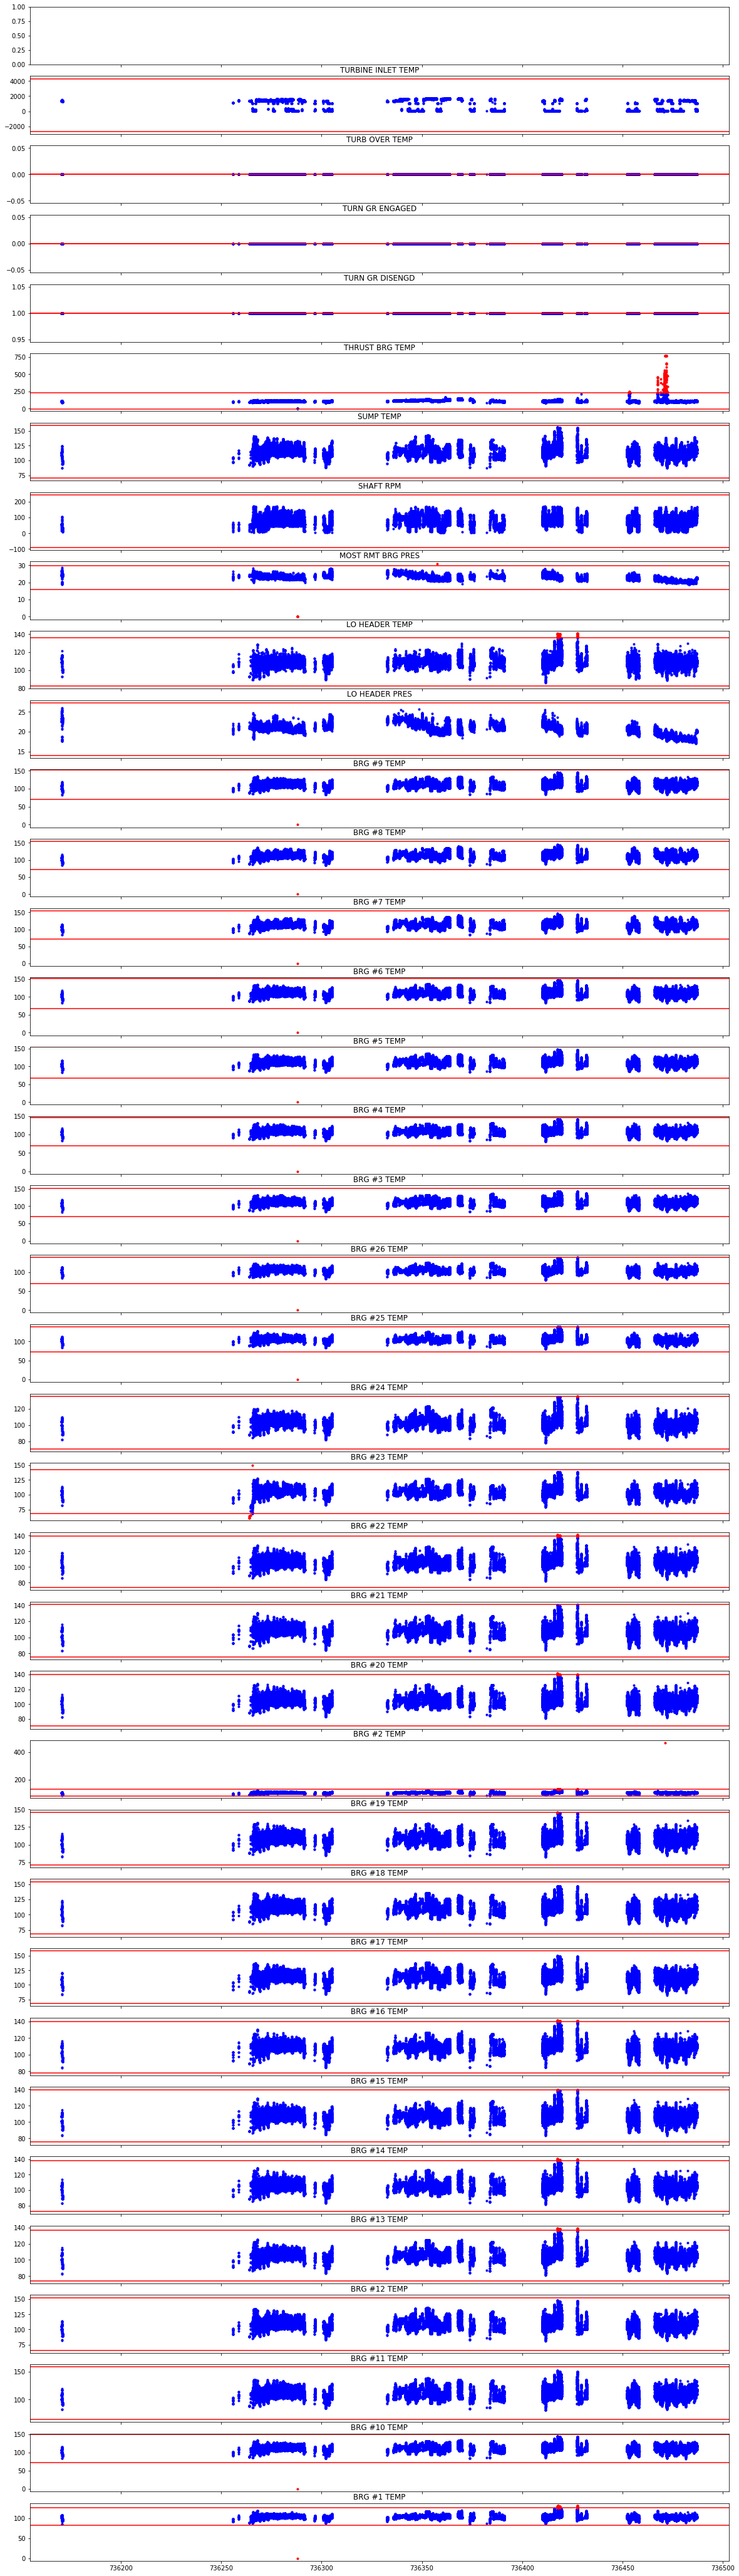

In [17]:
plotall(A1_MRG1_ts,threshold=5)

## Outliers
The tables below indicate singular outlier (>5$\sigma$) points for the A1_MRG1. These rows are deleted from the then removed from the dataframe.

|      |DateTime             |Value            | Column Name|
|------|---------------------|----------------:|:------------|
|193   |2016-10-28 17:45:02  |       149.199997|  BRG #23 TEMP|
|9458  |2016-11-19 22:07:20  |              0.0| MOST RMT BRG PRES|
|9458  |2016-11-19 22:07:20  |              0.0|  BRG #9 TEMP|
|9458  |2016-11-19 22:07:20  |              0.0|  BRG #8 TEMP|
|9458  |2016-11-19 22:07:20  |              0.0|  BRG #7 TEMP|
|9458  |2016-11-19 22:07:20  |              0.0|  BRG #6 TEMP|
|9458  |2016-11-19 22:07:20  |              0.0|  BRG #5 TEMP|
|9458  |2016-11-19 22:07:20  |              0.0|  BRG #4 TEMP|
|9458  |2016-11-19 22:07:20  |              0.0|  BRG #3 TEMP|
|9458  |2016-11-19 22:07:20  |              0.0| BRG #26 TEMP|
|9458  |2016-11-19 22:07:20  |              0.0|BRG #25 TEMP|
|9458  |2016-11-19 22:07:20  |              0.0|BRG #10 TEMP
|9458  |2016-11-19 22:07:20  |              0.0| BRG #1 TEMP|
|9459  |2016-11-19 22:09:42  |              0.0| MOST RMT BRG PRES|
|9460  |2016-11-19 22:09:52  |              0.0| MOST RMT BRG PRES|
|9461  |2016-11-19 22:11:22  |              0.0| MOST RMT BRG PRES|
|9462  |2016-11-19 22:17:16  |              0.0| MOST RMT BRG PRES|
|19738 |2017-01-28 14:39:06  |             30.6| MOST RMT BRG PRES|
|33451 |2017-05-22 01:19:39  |       465.799988|  BRG #2 TEMP|


In [18]:
out_index = [193,9458,9459,9460,9461,9462,19738,33451]
A1_MRG1_ts.drop(out_index,inplace=True)

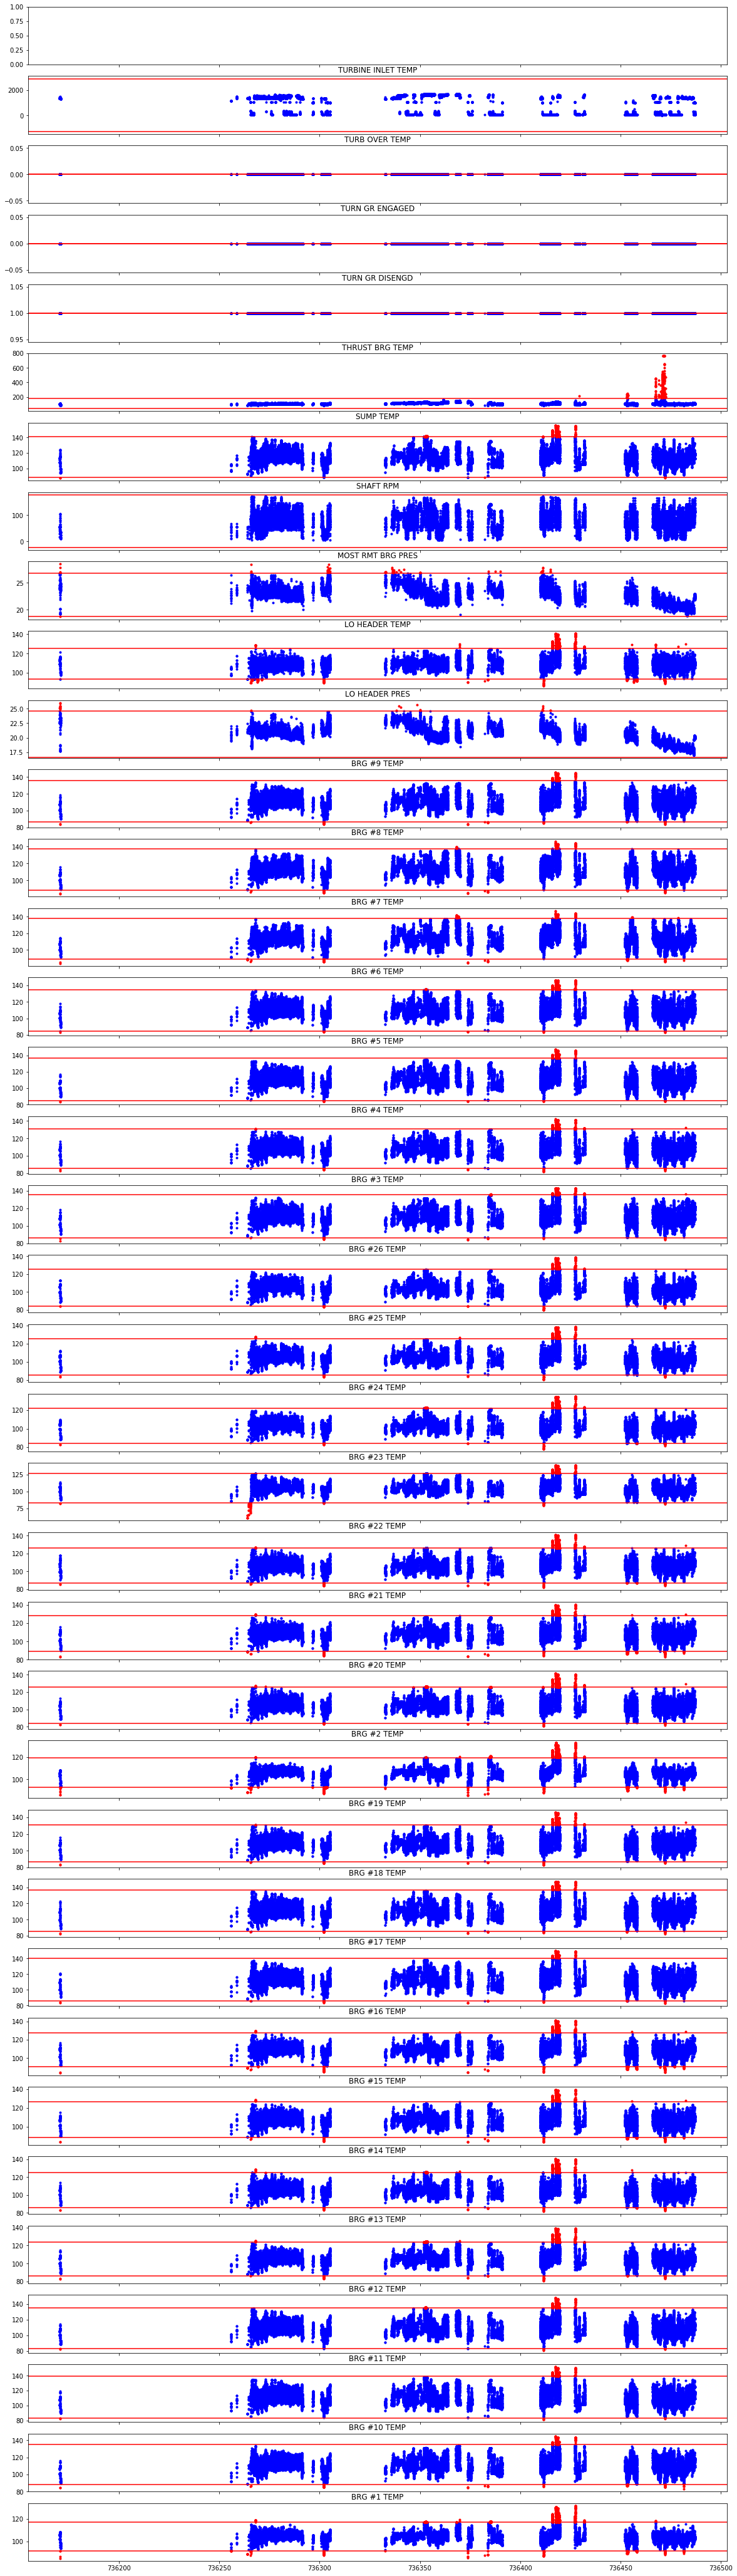

In [19]:
plotall(A1_MRG1_ts,threshold=3)